In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pl
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
customer_data=pd.read_csv('D:\\VISUAL_PROJECT_1\\BUYING BHEVIOUR\\social_ads.csv')
customer_data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


#  EDA

In [3]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [4]:
customer_data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [5]:
customer_data['Age'].max()

60

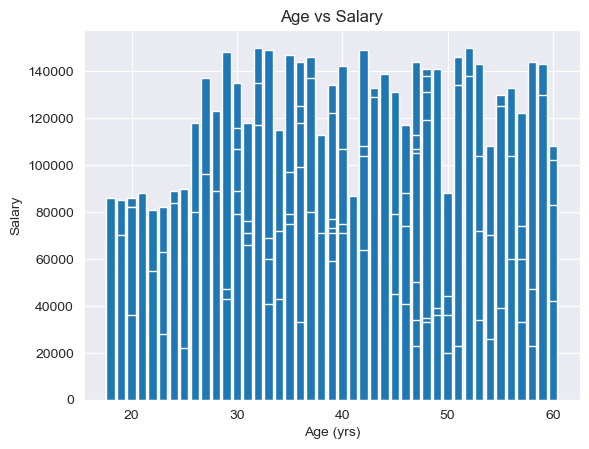

In [6]:
plt.bar( customer_data['Age'],customer_data['EstimatedSalary'] )
plt.xlabel("Age (yrs)")
plt.ylabel("Salary")
plt.title("Age vs Salary")
plt.grid(True)
plt.show()

Relation of salary With age 

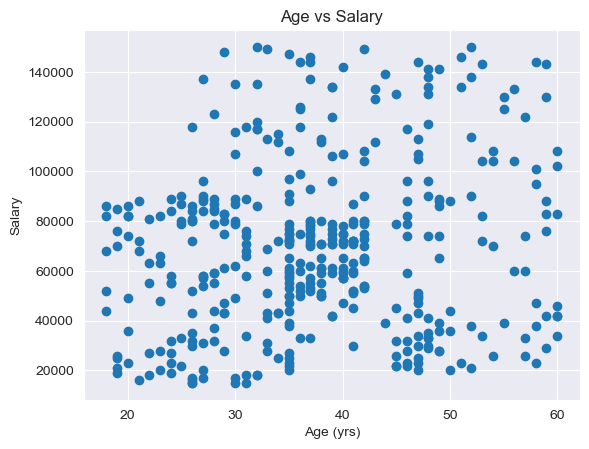

In [7]:
#scatter plot
plt.scatter( customer_data['Age'],customer_data['EstimatedSalary'] )
plt.xlabel("Age (yrs)")
plt.ylabel("Salary")
plt.title("Age vs Salary")
plt.grid(True)
plt.show()

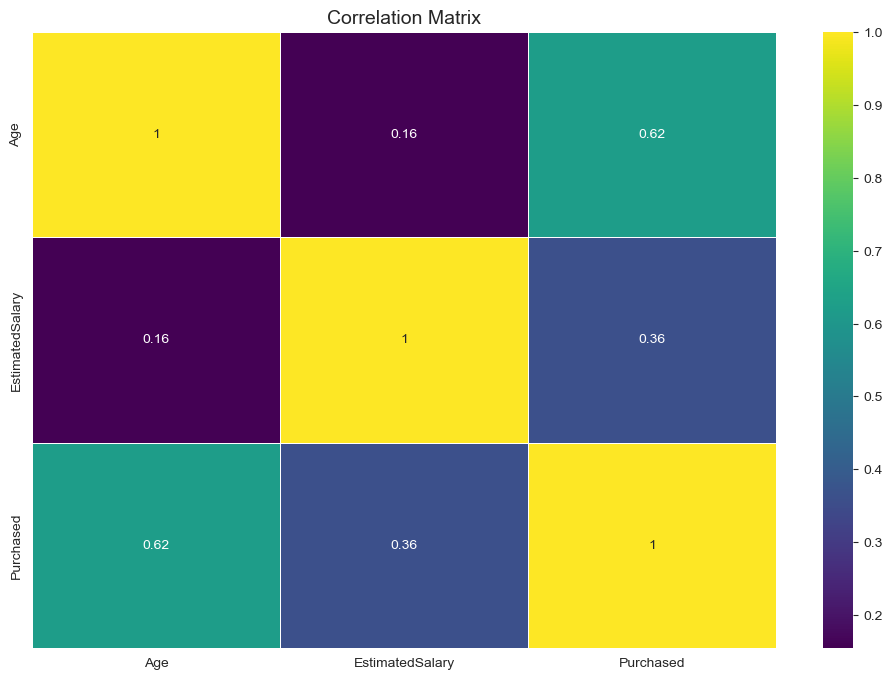

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(customer_data.corr(),annot=True,cmap='viridis',linewidths=0.5)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

The co-relation matrix shows that there has been a strong relation between age and purchasing interest.

In [9]:
from sklearn.model_selection import train_test_split
x=customer_data.drop(['Purchased'],axis=1)
y=customer_data['Purchased']

In [10]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [11]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
print(f'Training data has {len(x_train)} entries')
print(f'Test data has {len(x_val)} entries')

Training data has 320 entries
Test data has 80 entries


In [13]:
clf_lr=LogisticRegression(random_state=0,max_iter=1000)
clf_lr.fit(x_train,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",0
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multic

In [14]:
prediction=clf_lr.predict(x_val)
score=accuracy_score(y_val,prediction)
print(f'Accuracy score on Logistic Regression {(score*100)} %')

Accuracy score on Logistic Regression 88.75 %


In [15]:
from sklearn.svm import SVC
clf_svm=SVC(kernel='rbf',random_state=0)
clf_svm.fit(x_train,y_train)
svm_pred=clf_svm.predict(x_val)
svm_score=accuracy_score(y_val,svm_pred)
print(f'Accuracy score on SVM {(svm_score*100)} %')

Accuracy score on SVM 73.75 %


In [16]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(criterion = 'gini')
clf_rf.fit(x_train,y_train)
rf_pred = clf_rf.predict(x_val)
rf_score=accuracy_score(y_val,rf_pred)
print(f"Validation Accuracy RF is : {(rf_score*100)}")

Validation Accuracy RF is : 88.75


In [17]:
from xgboost import XGBClassifier

clf_xg = XGBClassifier(eval_metric = 'logloss')
clf_xg.fit(x_train,y_train)

xgb_pred = clf_xg.predict(x_val)
xgb_score=accuracy_score(y_val,xgb_pred)
print(f"Validation Accuracy XGB is : {(xgb_score*100)}")

Validation Accuracy XGB is : 90.0


In [18]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier( criterion = 'gini'  , random_state = 0)
clf_dt.fit(x_train,y_train)
dt_pred = clf_dt.predict(x_val)
dt_score=accuracy_score(y_val,dt_pred)
print(f"Validation Accuracy DT is : {(dt_score*100)}")

Validation Accuracy DT is : 83.75


In [19]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier()
clf_knn.fit(x_train,y_train)
knn_pred = clf_knn.predict(x_val)
knn_score=accuracy_score(y_val,knn_pred)
print(f"Validation Accuracy KNN is : {(knn_score*100)}")

Validation Accuracy KNN is : 82.5


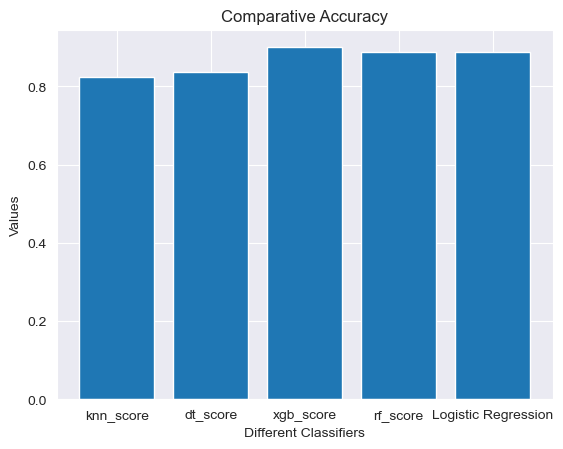

In [20]:
x = ['knn_score', 'dt_score', 'xgb_score', 'rf_score', 'Logistic Regression']
y = [knn_score, dt_score, xgb_score, rf_score, score]
plt.bar(x, y)
plt.xlabel('Different Classifiers')
plt.ylabel('Values')
plt.title('Comparative Accuracy')

plt.show()

In [21]:
print(f'Accuracy score on SVM {(svm_score*100)} %')
print(f'Accuracy score on Logistic Regression {(score*100)} %')
print(f"Validation Accuracy KNN is : {(knn_score*100)}")
print(f"Validation Accuracy DT is : {(dt_score*100)}")
print(f"Validation Accuracy XGB is : {(xgb_score*100)}")
print(f"Validation Accuracy RF is : {(rf_score*100)}")

Accuracy score on SVM 73.75 %
Accuracy score on Logistic Regression 88.75 %
Validation Accuracy KNN is : 82.5
Validation Accuracy DT is : 83.75
Validation Accuracy XGB is : 90.0
Validation Accuracy RF is : 88.75
